In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def project_hyperplane(a, b, y):
    #print(a.shape, y.shape)
    l = (a @ y - b) / (a.T @ a)
    return y - a * l

In [3]:
def show_projection():
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
        
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
        
    A = np.random.rand(1, 2)
    b = 0.5
    
    y = np.random.rand(2, 1)
    
    x = project_hyperplane(A[0,:], b, y[:,0])
    ax.scatter([y[0], x[0]], [y[1], x[1]], color='black')
    ax.plot([y[0], x[0]], [y[1], x[1]], color='grey', linestyle='--')
    ax.text(x[0] - 0.1, x[1] - 0.1, 'x', fontsize = 15)
    ax.text(y[0] + 0.1, y[1] + 0.1, 'y', fontsize = 15)
    delta = 0.05
    p = np.arange(-1.5, 1.5, delta)
    q = np.arange(-1.5, 1.5, delta)
    X, Y = np.meshgrid(p, q)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = A @ np.array([X[i][j], Y[i][j]])
    CS = ax.contour(X, Y, Z, [b], colors=['blue'])
    plt.close(fig)
    return fig

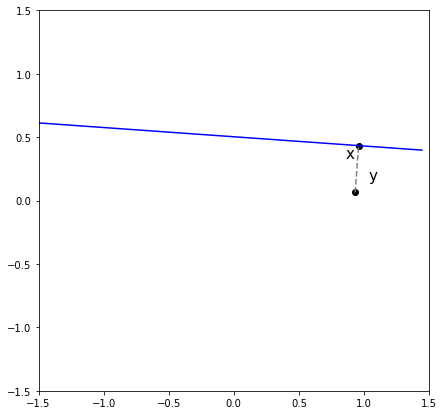

In [4]:
show_projection()

In [34]:
import random

In [179]:
def kaczmarz(A, b, x_0, iters):
    result = [x_0.copy()]
    x = x_0
    beta = 0.9
    alpha = 1
    for t in range(iters):
        for _ in range(A.shape[0]):
            i = random.randint(0, A.shape[0] - 1)
            #print(i)
            x = x + alpha * (project_hyperplane(A[i,:], b[i], x) - x)
            #x = (1 if alpha is None else alpha ** t) * (b[i] - np.dot(A[i], x)) / (np.dot(A[i], A[i])) * A[i]
        result.append(x.copy())
        
    return result

In [174]:
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

def conjugate_gradient(A, b, x_0):
    x = x_0
    v = (A @ x - b)
    d = v
    v_norm = np.dot(v, v)
    
    result = [x.copy()]
    for i in range(len(b)):
        Ad = np.dot(A, d)
        alpha = v_norm / np.dot(d, Ad)
        x = x - alpha * d
        v = v - alpha * Ad
        v_norm_new = np.dot(v, v)

        d = v + (v_norm_new / v_norm) * d
        v_norm = v_norm_new
        result.append(x.copy())
    return result

def show_kaczmarz_and_cgd(dim=500):
    A = np.random.rand(dim, dim)
    A = (1 / dim) *  A @ A.T
    A = A + np.diag(np.sum(np.abs(A), axis=-1))
    
    sD = sp.linalg.sqrtm(np.linalg.inv(np.diag(np.diag(A))))
    A = sD.T @ A @ sD
    b = np.random.rand(dim)
    fig, axs = plt.subplots(1, 1, figsize=(10, 7))
    eig, v = np.linalg.eigh(A)
    m, M = eig[0], eig[-1]
    print(m, M)
    print('Condition(A):', M / m)
    x = np.zeros_like(b)
    A_inv = np.linalg.inv(A)
    
    
    iters = dim
    
    #estimates_conjugate_gradient = conjugate_gradient(A, b, x)
    estimates_kaczmarz = kaczmarz(A, b, x, iters)
    
    #axs.plot([i for i in range(len(estimates_conjugate_gradient))], [np.linalg.norm(A @ x - b) for x in estimates_conjugate_gradient], label='CGD')
    axs.plot([i for i in range(len(estimates_kaczmarz))], [np.linalg.norm(A @ x - b) for x in estimates_kaczmarz], label='Kaczmarz')
    
    axs.legend()
    axs.set_ylabel(r'$\|Ax_k-b\|$', fontsize=20)
    axs.set_xlabel(r'$k$', fontsize=20)
    axs.set_yscale('log')
    plt.close(fig)
    return fig

0.9973092033529575 1.9946822725394786
Condition(A): 2.0000640381471952


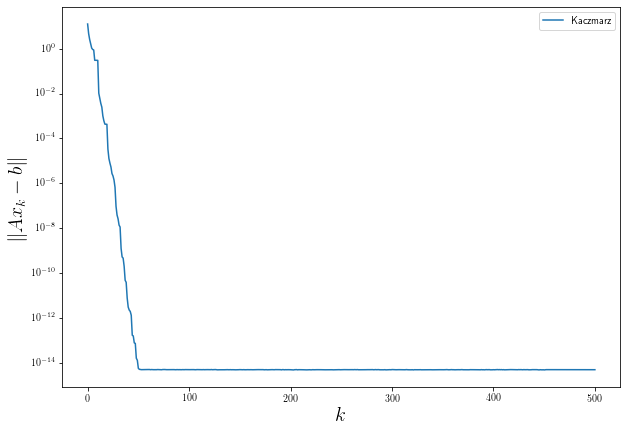

In [180]:
show_kaczmarz_and_cgd(500)